## Bike Sharing Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'D:\UPGRAD\ML\Bike Sharing Assignment\day.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# we can see that data has no null values 

In [6]:
data2=data.copy()

In [8]:
data2.drop_duplicates(subset=None, inplace=True)

In [9]:
data2.shape

(730, 16)

In [10]:
data.shape

(730, 16)

In [11]:
#Hence we do not have any duplicates

Lets remove the unwanted columns

In [13]:
data_n=data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

### EDA

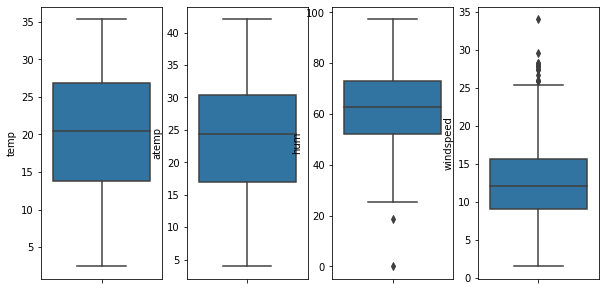

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1,4,1)
sns.boxplot( y = 'temp', data = data_n)
plt.subplot(1,4,2)
sns.boxplot( y = 'atemp', data = data_n)
plt.subplot(1,4,3)
sns.boxplot( y = 'hum', data = data_n)
plt.subplot(1,4,4)
sns.boxplot( y = 'windspeed', data = data_n)

plt.show()

In [15]:
# Luckily data dont have many outliers ==> Hence we can proceed 

<Figure size 1440x1440 with 0 Axes>

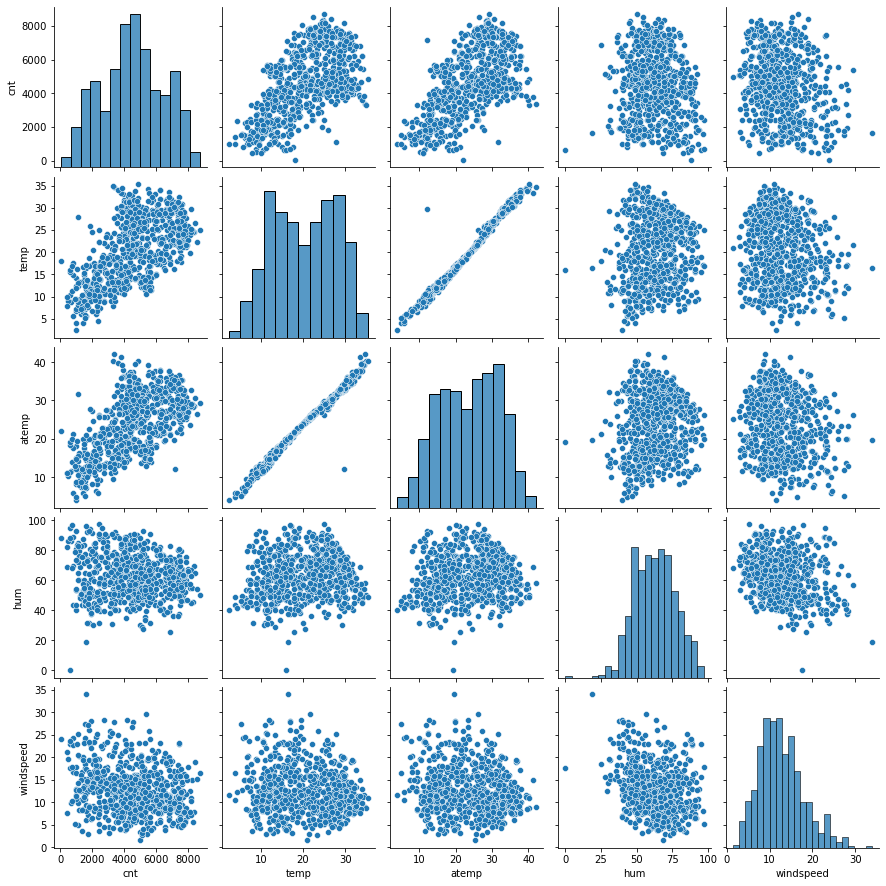

In [16]:
plt.figure(figsize = (20,20))
sns.pairplot(data=data_n,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [17]:
# temp and atemp are correltaed to each other 
# temp and atemp both are most correled with the target variable 

In [18]:
# Lets analyse the correlation in data 

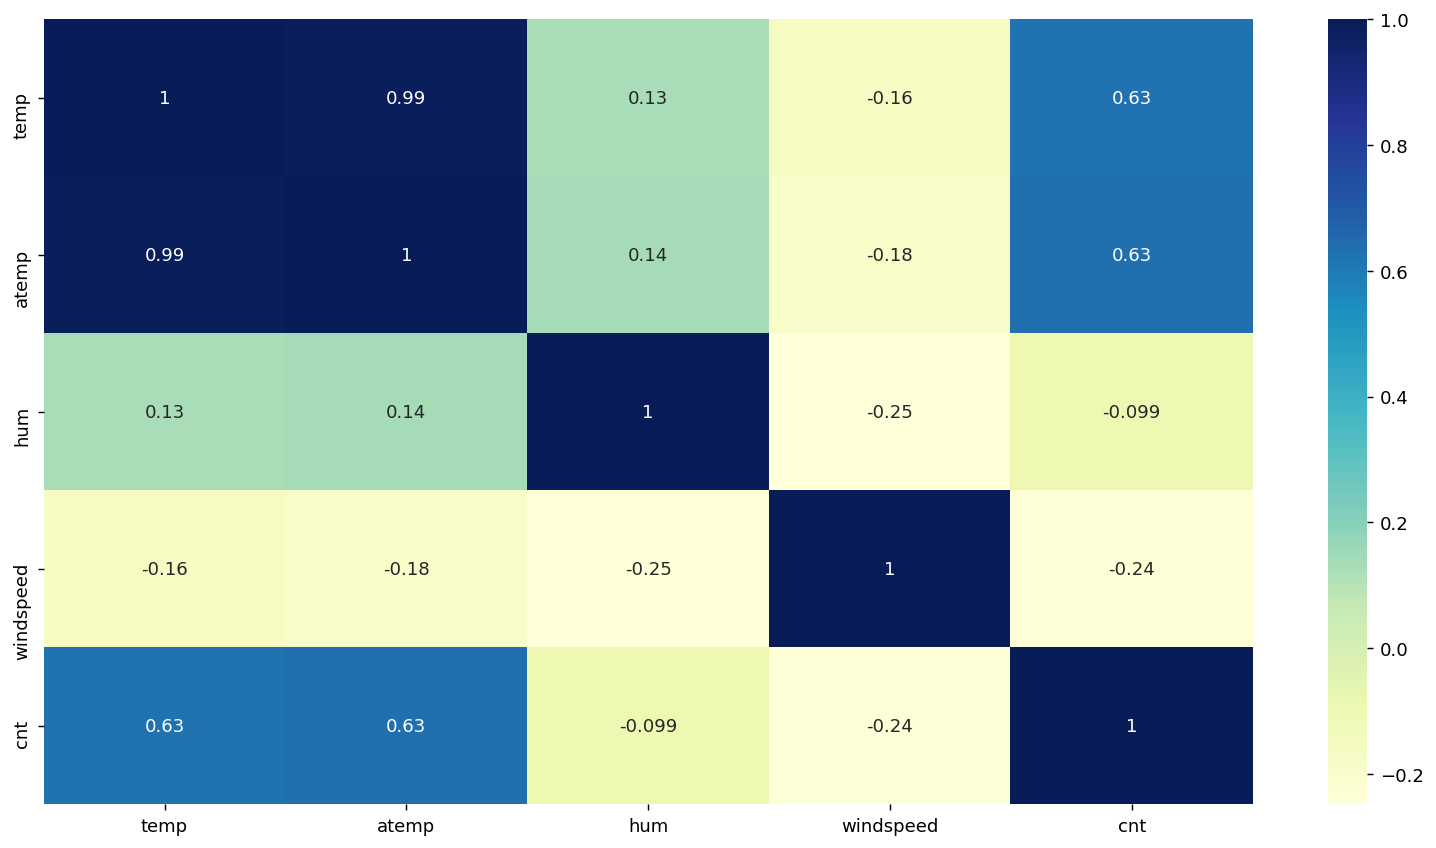

In [21]:
cols = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
sns.heatmap(data_n[cols].corr(),annot= True,cmap="YlGnBu")
plt.show()

 we can infer that humidity is least correleted while atemp is highly correleted

# Creating Dummy Variables

In [24]:
data_n['season']=data_n['season'].astype('category')
data_n['weathersit']=data_n['weathersit'].astype('category')
data_n['mnth']=data_n['mnth'].astype('category')
data_n['weekday']=data_n['weekday'].astype('category')

In [26]:
data_n = pd.get_dummies(data_n, drop_first=True)
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## SPLITTING THE DATA

In [27]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data_n, train_size = 0.70, test_size = 0.30, random_state = 333)

# RESCALING THE FEATURES

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [32]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-32-d085bba7b9e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\bhush\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

we are going to use the RFE model for feature selection 

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)        
rfe = rfe.fit(X_train, y_train)

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 13),
 ('mnth_5', False, 10),
 ('mnth_6', False, 14),
 ('mnth_7', False, 7),
 ('mnth_8', False, 11),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 15),
 ('weathersit_2', False, 5),
 ('weathersit_3', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\bhush\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.95
3,temp,7.13
5,windspeed,4.18


We are using stats model for model building 

In [43]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)


lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [44]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.87e-177
Time:                        20:17:48   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

- Removing the variable 'weekday_4        ' based on its High p-value 

Model 2

In [46]:
X_train_new = X_train_rfe.drop(["weekday_4"], axis = 1)

In [47]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [48]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.87e-177
Time:                        20:20:08   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

Lets remove the some features with high p value 

In [50]:
X_train_new = X_train_new.drop(["weekday_2","weekday_3","weekday_5","weekday_1"], axis = 1)

In [51]:
X_train_lm3 = sm.add_constant(X_train_new)


lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [52]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Sun, 15 May 2022   Prob (F-statistic):          3.23e-181
Time:                        20:22:21   Log-Likelihood:                 482.55
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     499   BIC:                            -896.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2689      0.028      9.684   

In [53]:
X_train_new = X_train_new.drop(["workingday","holiday"], axis = 1)

In [54]:
X_train_lm4 = sm.add_constant(X_train_new)


lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [55]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.6
Date:                Sun, 15 May 2022   Prob (F-statistic):          9.31e-183
Time:                        20:23:43   Log-Likelihood:                 480.37
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     501   BIC:                            -904.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2745      0.027     10.146   

## Residual Analysis of the train data

In [56]:
y_train_pred = lr4.predict(X_train_lm4)

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

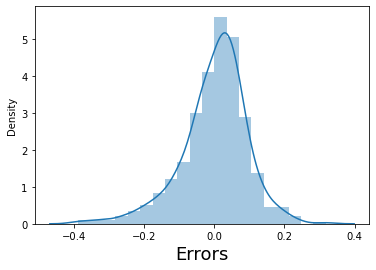

In [57]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)               
plt.xlabel('Errors', fontsize = 18)   

##### Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Making Predictions ON TEST SETS

In [58]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-58-84df89cad62a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\bhush\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [59]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

##### Need to select features from train data set 

In [60]:
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   hum           219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(1), uint8(4)
memory usage: 11.1 KB


Lets make predictions by using final model 

In [61]:
y_pred = lr4.predict(X_test_lm4)

## Model Evaluation

Text(0, 0.5, 'y_pred')

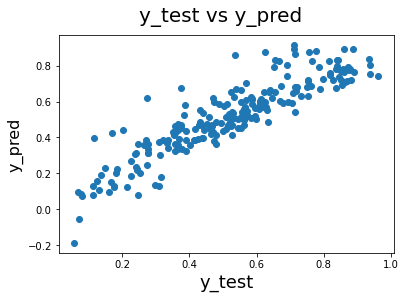

In [62]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)    

Lets check r value for test 

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8041059519920989

# Final results 

Top 3 factors that influence the bike bookings are <br>
==> Temp ==> unit increase in temp will increase the bike bookings by 0.6066<br>
==> Hum ==> unit increase in hum will decrease the bike bookings by 0.2816<br>
==>windspeed==> unit increase in windspeed will decrease the bike bookingd by 0.2123

Hence we need to consider these factors while planning the supply side of bikes